In [76]:
#!pip install import-ipynb
#!pip install mpl-finance

import import_ipynb 
import get_data as get
import graph_plot
import returns as ret

importing Jupyter notebook from returns.ipynb


In [69]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os 
import pandas_datareader as web
from time import time
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.dates as mdates 



TWTR data already saved in stock_dfs.
 0    472
 1    185
-1     99
Name: Regime, dtype: int64
Date
2016-09-13         NaN
2016-09-14   -0.017858
2016-09-15   -0.012095
2016-09-16   -0.043311
2016-09-19    0.040037
                ...   
2019-09-09   -0.000000
2019-09-10   -0.000000
2019-09-11    0.000000
2019-09-12   -0.000000
2019-09-13   -0.000000
Name: Strategy, Length: 756, dtype: float64
Duration in Seconds:   0.081


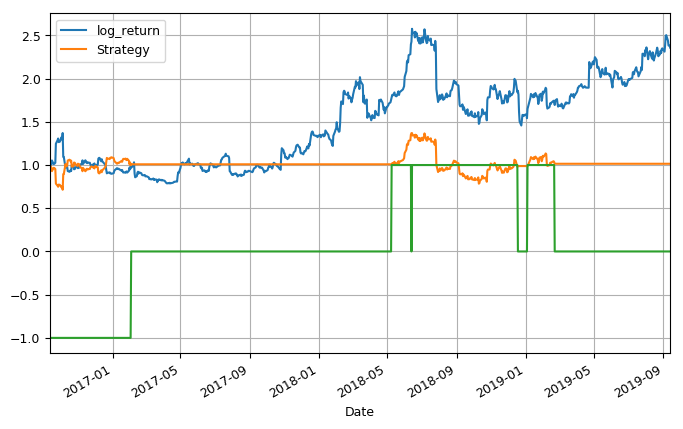

In [94]:
def movingAverageStrat(ticker, years = 3, months = 0, 
                       days = 0,verbose=True):
    
    if years>10 and verbose: 
        print('''In get_data() method, I have only extracted data for the last 10 years, 
        please change the above method for more historic data\nIf you would like to see all the prices plot, 
        then make verbose = False''')
 
   ######## sorting out the data so that code is efficient and doesn't reload when not necessary ################  
    else:
        if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                         parse_dates=True,index_col=0)

            if not {'42D','252D','42D-252D','Returns'}.issubset(data.columns): 
                df_close = data['Adj Close']
                
                ema_252 = get.exponential_moving_average(df_close,window = 252)
                get.add_col(ema_252,ticker,heading = '252D')
                
                ema_42 = get.exponential_moving_average(df_close,window = 42)
                get.add_col(ema_42,ticker,heading ='42D')
                
                difference = ema_42-ema_252
                get.add_col(difference,ticker,heading ='42D-252D')
                
                ret.returns(ticker)
                print('Adding relative column to existing {}.csv file'.format(ticker))

            else:
                print('')
                print('{} data already saved in stock_dfs.'.format(ticker))

        else: 
            get.get_data(ticker, verbose = False)
            data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                     parse_dates=True,index_col=0)
            
            df_close = data['Adj Close']
            ema_252 = get.exponential_moving_average(df_close,window = 252)
            get.add_col(ema_252,ticker,heading = '252D')

            ema_42 = get.exponential_moving_average(df_close,window = 42)
            get.add_col(ema_42,ticker,heading ='42D')
            
            difference = ema_42-ema_252
            get.add_col(difference,ticker,heading ='42D-252D')
            
            ret.returns(ticker)
            
            print('{} data now saved in stock_dfs folder. \n'.format(ticker))

        df = get.specified_prices(data,years=years,months=months,days=days) 
        ###################################################################################
        
        SD = 12
        df['Regime'] = np.where(df['42D-252D'] > SD, 1, 0)
        df['Regime'] = np.where(df['42D-252D'] < -SD, -1, df['Regime'])
        print(df['Regime'].value_counts())
        #print(df[['Regime','42D-252D']])
        
        df['log_return'] = np.log(1+df['Returns'])
        df['Strategy'] = df['Regime'].shift(1)*df['log_return']
        print(df['Strategy'])

        df[['log_return','Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8,5))
        
        graph_plot.candle_rsi(ticker,ema_fast = 42, ema_slow = 252, years = years, months = months, 
               days = days)
        df['Regime'].plot(linewidth=1.5,figsize=(8,5),grid=True)
        #plt.ylim([-1.1, 1.1])
        
    #return data
ticker = 'TWTR'
t0 = time()
pd.options.mode.chained_assignment = None  #i was getting some annoying error so i turned if off
movingAverageStrat(ticker,years = 3, months = 0, 
                       days = 0,verbose=True)
#print(data.tail())
timed = time() - t0
print('Duration in Seconds: %7.3f' % timed)

In [30]:
df = movingAverageStrat(ticker, years=5,verbose=True)
pd.Series(['High','Close']).isin(df.columns).all()



Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Returns',
       'MACD', 'MACD_EMA9', 'RSI', '252D', '42D'],
      dtype='object')
Adding relative column to existing AAPL.csv file


False

In [32]:
{'High','Close'}.issubset(df.columns)

True